In [1]:
#simple linear regression (one independent variable)
#store data points into data frames/numpy arrays
#noise = how far off from the linear equation a point is
#linear_model form scikit-learn
#fit and predict method

#multiple linear regression (multiple independent variables)
#put predictor variables stored as a single variable and use fit/predict methods

#seaborn: regplot and residplot and distplot functions 
#residual plot to study the errors and see if function should be linear or not
#distribution plot 

#polynomial regression 
#curvilinear relationship: relationship gotten by squaring or setting high-order terms predictor values to transform the data
#2nd order, 3rd order, etc. 
#polyfit() function
#multidimensional polynomial functions - polynomialfeatures method and preprocessing via sklearn

#pipelines
#sequentially perform a series of transformations and carries out a prediction
#create pipeline object and apply train method

#measures for in sample evaluation
#mean squared error (MSE): Mean_squared_error from sklearn.metrics
#r-squared: how close data is to regression line: 1 - (MSE of regression line/MSE of ybar)
#lm.score to get r-squared value 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(file)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#linear regression
from sklearn.linear_model import LinearRegression

#linear regression object creation
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
#highway mpg as predictor variable of price 
X = df[['highway-mpg']]
Y = df['price']

lm.fit(X,Y) #fit linear model
Yhat = lm.predict(X)
Yhat[0:5] #predict y from x of 0 to 5

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [9]:
#value of intercept 
a = lm.intercept_
print(a)
#value of slope 
b = lm.coef_
print(b)

38423.305858157386
[-821.73337832]


In [12]:
#engine-size as independent variable predicting price
lm = LinearRegression()
lm

X = df[['engine-size']]
Y = df['price']

lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]

a = lm.intercept_
print(a)
b = lm.coef_
print(b)


-7963.338906281049
[166.86001569]


In [13]:
#multiple linear regression
#develop model using variables horsepower, curb-weight, engine size, and highway mpg

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price']) #fit linear model using Z to price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#intercept values
a = lm.intercept_
print(a)
b = lm.coef_
print(b)

-15806.624626329198
[53.49574423  4.70770099 81.53026382 36.05748882]


In [15]:
#final estimated function...
#price = -15806.6 + 53.5xhorsepower + 4.7xcurb-weight + 81.5xengine-size + 36.0xhighway-mpg

In [20]:
#multiple lin reg model w/ normalized losses and highway mpg
lm2 = LinearRegression()

lm2.fit(df[['normalized-losses', 'highway-mpg']],df['price'])

a = lm2.intercept_
print(a)
b = lm2.coef_
print(b)

38201.31327245728
[   1.49789586 -820.45434016]


In [21]:
#visualization using seaborn
import seaborn as sns
%matplotlib inline

(0, 48282.92232848297)

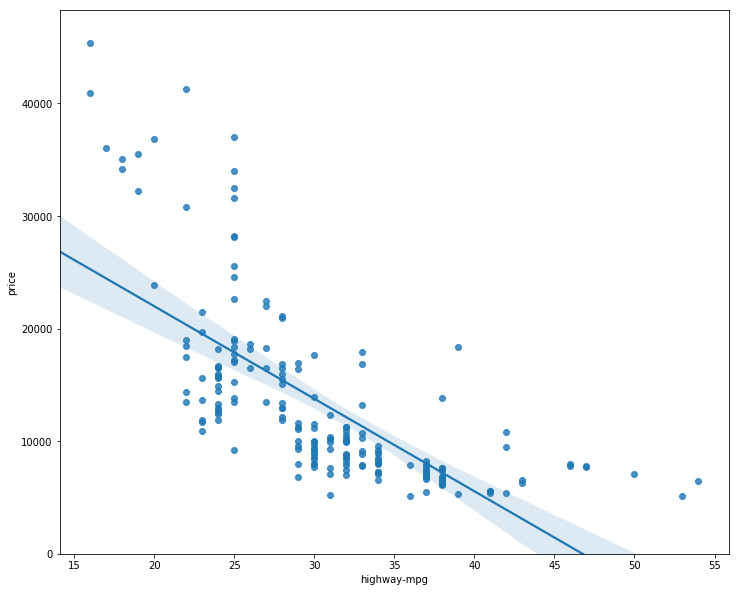

In [23]:
#regression plot for horsepower as predictor of variable price
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

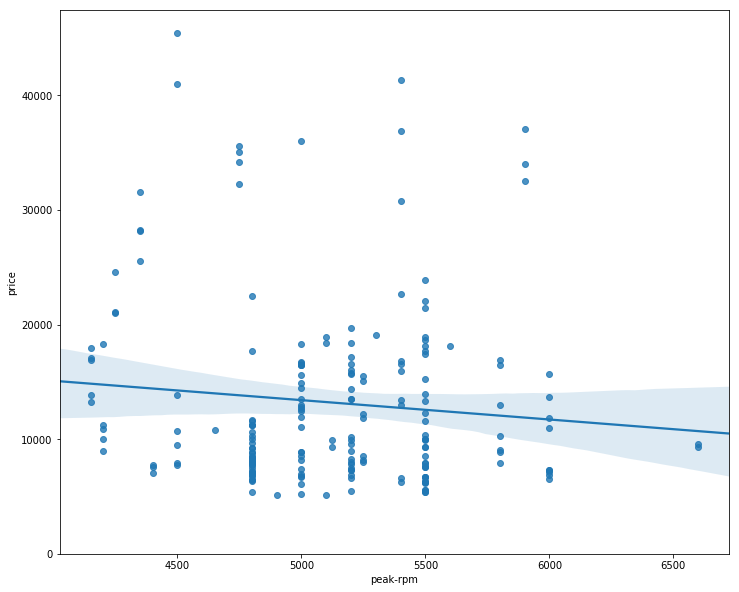

In [24]:
#peak rpm regression plot
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [25]:
#highway-mpg points are closer around line while peak rpm are not

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [30]:
Y_hat = lm.predict(Z)

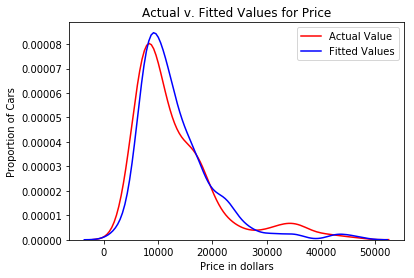

In [29]:
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual v. Fitted Values for Price')
plt.xlabel('Price in dollars')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [31]:
#create PlotPolly function to plot data

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [33]:
x = df['highway-mpg']
y = df['price']

#3rd order polynomial
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


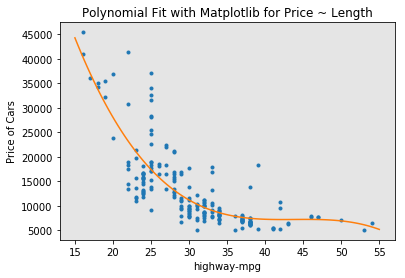

In [34]:
PlotPolly(p,x,y,'highway-mpg')

In [36]:
np.polyfit(x,y,3)
#this polynomial model fits better than the linear model

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


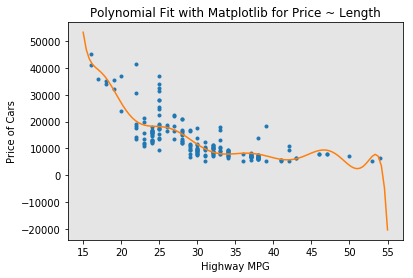

In [37]:
# calculate polynomial
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p)
PlotPolly(p1,x,y, 'Highway MPG')

In [38]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
pr
Z_pr=pr.fit_transform(Z)

In [39]:
Z.shape
Z_pr.shape

(201, 6)

In [40]:
#pipeline
#standard scaler as a step in pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe

pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:4]

C:\Users\Sydney\Documents\Sydney\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sydney\Documents\Sydney\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\Sydney\Documents\Sydney\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

In [ ]:
#r2 highway mpg simple linear regression

In [46]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The R-square is:  0.7609686443622008
The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [47]:
#MSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [51]:
#multiple linear regression r2 and MSE
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The R-square is:  0.4966263556974878
The mean square error of price and predicted value using multifit is:  31632832.975589428


In [52]:
#polynomial fit r2 and MSE
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

mean_squared_error(df['price'], p(x))

The R-square value is:  0.6741946663906513


20474146.42636125

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

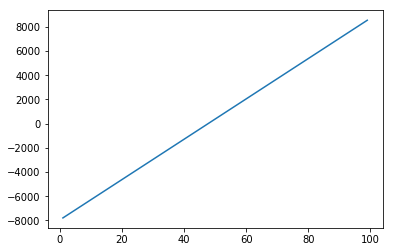

In [56]:
new_input = np.arange(1,100,1).reshape(-1,1)

lm.fit(X,Y)
lm

yhat = lm.predict(new_input)
yhat[0:5]

plt.plot(new_input, yhat)
plt.show()

In [57]:
#higher R-squared value better fit for data
#smallest MSE value is better fit for data
#multiple linear regression model better than simple linear regression model
#polynomial fit better than simple linear model
#MLR model is best model compared to polynomial

#conclusion: MLR model is the best overall to predict price from the dataset